In [73]:
import pandas as pd
import numpy as np
import datetime
import time
import matplotlib.pyplot as plt

In [74]:
customers = pd.read_csv(r'/Users/nadiiapoliakovska/Documents/Springboard/Users_active_time_prediction/data/raw/archive/customers.csv')
customers

,id,gender,age,number_of_kids
0,979863,MALE,26,2
1,780123,MALE,60,2
2,614848,MALE,45,4
3,775046,MALE,62,3
4,991601,MALE,23,0
...,...,...,...,...
2495,208889,FEMALE,18,0
2496,385802,FEMALE,25,0
2497,990291,MALE,71,0
2498,285058,MALE,28,4


In [75]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2500 non-null   int64 
 1   gender          2500 non-null   object
 2   age             2500 non-null   int64 
 3   number_of_kids  2500 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 78.2+ KB


In [76]:
customers.gender.value_counts()

MALE      1894
FEMALE     606
Name: gender, dtype: int64

In [77]:
customers.age.describe()

count    2500.000000
mean       35.922400
std        14.171207
min        18.000000
25%        25.000000
50%        31.000000
75%        45.000000
max        75.000000
Name: age, dtype: float64

<AxesSubplot: >

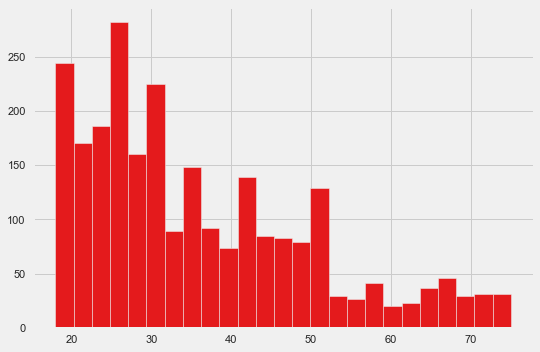

In [78]:
customers.age.hist(bins = 25)

In [79]:
customers.number_of_kids.value_counts()

0    1112
3     357
4     355
1     355
2     321
Name: number_of_kids, dtype: int64

In [80]:
pings = pd.read_csv(r'/Users/nadiiapoliakovska/Documents/Springboard/Users_active_time_prediction/data/raw/archive/pings.csv')
pings

,id,timestamp
0,899313,1496278800
1,373017,1496278800
2,798984,1496278800
3,245966,1496278800
4,689783,1496278800
...,...,...
50528696,282579,1498100130
50528697,282579,1498100145
50528698,282579,1498100160
50528699,282579,1498100190


In [81]:
pings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50528701 entries, 0 to 50528700
Data columns (total 2 columns):
 #   Column     Dtype
---  ------     -----
 0   id         int64
 1   timestamp  int64
dtypes: int64(2)
memory usage: 771.0 MB


In [82]:
def to_date(x):
    f = datetime.datetime.fromtimestamp(x)
    return f

In [83]:
pings['timestamp_to_datetime'] = pings.timestamp.apply(to_date)

In [84]:
pings['timestamp_to_datetime'][0]

Timestamp('2017-05-31 18:00:00')

In [85]:
pings.head()

,id,timestamp,timestamp_to_datetime
0,899313,1496278800,2017-05-31 18:00:00
1,373017,1496278800,2017-05-31 18:00:00
2,798984,1496278800,2017-05-31 18:00:00
3,245966,1496278800,2017-05-31 18:00:00
4,689783,1496278800,2017-05-31 18:00:00


In [86]:
pings.tail()

,id,timestamp,timestamp_to_datetime
50528696,282579,1498100130,2017-06-21 19:55:30
50528697,282579,1498100145,2017-06-21 19:55:45
50528698,282579,1498100160,2017-06-21 19:56:00
50528699,282579,1498100190,2017-06-21 19:56:30
50528700,282579,1498100220,2017-06-21 19:57:00


In [87]:
pings.drop_duplicates(inplace = True)

In [88]:
len(pings)

50489158

In [89]:
pings.sort_values(by='timestamp_to_datetime', ascending=True, inplace = True)

In [90]:
pings['date'] = pings['timestamp_to_datetime'].dt.date

In [91]:
pings['online_hours'] = pings.groupby(by=['id','date'])['timestamp'].diff()/3600

In [92]:
pings['online_hours']  =  pings['online_hours'].apply(lambda x: x if x< (2/60) else (2/60))

In [93]:
pings

,id,timestamp,timestamp_to_datetime,date,online_hours
0,899313,1496278800,2017-05-31 18:00:00,2017-05-31,0.033333
1,373017,1496278800,2017-05-31 18:00:00,2017-05-31,0.033333
2,798984,1496278800,2017-05-31 18:00:00,2017-05-31,0.033333
3,245966,1496278800,2017-05-31 18:00:00,2017-05-31,0.033333
4,689783,1496278800,2017-05-31 18:00:00,2017-05-31,0.033333
...,...,...,...,...,...
50528696,282579,1498100130,2017-06-21 19:55:30,2017-06-21,0.004167
50528697,282579,1498100145,2017-06-21 19:55:45,2017-06-21,0.004167
50528698,282579,1498100160,2017-06-21 19:56:00,2017-06-21,0.004167
50528699,282579,1498100190,2017-06-21 19:56:30,2017-06-21,0.008333


In [94]:
pings.fillna(0,inplace = True)

In [95]:
pings

,id,timestamp,timestamp_to_datetime,date,online_hours
0,899313,1496278800,2017-05-31 18:00:00,2017-05-31,0.033333
1,373017,1496278800,2017-05-31 18:00:00,2017-05-31,0.033333
2,798984,1496278800,2017-05-31 18:00:00,2017-05-31,0.033333
3,245966,1496278800,2017-05-31 18:00:00,2017-05-31,0.033333
4,689783,1496278800,2017-05-31 18:00:00,2017-05-31,0.033333
...,...,...,...,...,...
50528696,282579,1498100130,2017-06-21 19:55:30,2017-06-21,0.004167
50528697,282579,1498100145,2017-06-21 19:55:45,2017-06-21,0.004167
50528698,282579,1498100160,2017-06-21 19:56:00,2017-06-21,0.004167
50528699,282579,1498100190,2017-06-21 19:56:30,2017-06-21,0.008333


In [96]:
train = (pings.groupby(by = ['id','date'])['online_hours'].sum()).reset_index()

In [97]:
train['online_hours'] = round(train['online_hours'],1)

In [98]:
train

,id,date,online_hours
0,111556,2017-05-31,2.2
1,111556,2017-06-01,2.5
2,111556,2017-06-04,4.7
3,111556,2017-06-05,3.2
4,111556,2017-06-06,2.7
...,...,...,...
44467,998229,2017-06-16,7.6
44468,998229,2017-06-17,4.9
44469,998229,2017-06-18,6.5
44470,998229,2017-06-19,9.2


In [99]:
test = pd.read_csv(r'/Users/nadiiapoliakovska/Documents/Springboard/Users_active_time_prediction/data/raw/archive/test.csv')
test

,id,date,online_hours
0,979863,28/06/17,7
1,979863,27/06/17,9
2,979863,26/06/17,9
3,979863,25/06/17,10
4,979863,24/06/17,9
...,...,...,...
17495,165666,26/06/17,7
17496,165666,25/06/17,7
17497,165666,24/06/17,10
17498,165666,23/06/17,6


In [100]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17500 entries, 0 to 17499
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            17500 non-null  int64 
 1   date          17500 non-null  object
 2   online_hours  17500 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 410.3+ KB


In [101]:
type(test.date[0])

str

In [102]:
test['date'] = pd.to_datetime(test['date'])
test

,id,date,online_hours
0,979863,2017-06-28,7
1,979863,2017-06-27,9
2,979863,2017-06-26,9
3,979863,2017-06-25,10
4,979863,2017-06-24,9
...,...,...,...
17495,165666,2017-06-26,7
17496,165666,2017-06-25,7
17497,165666,2017-06-24,10
17498,165666,2017-06-23,6


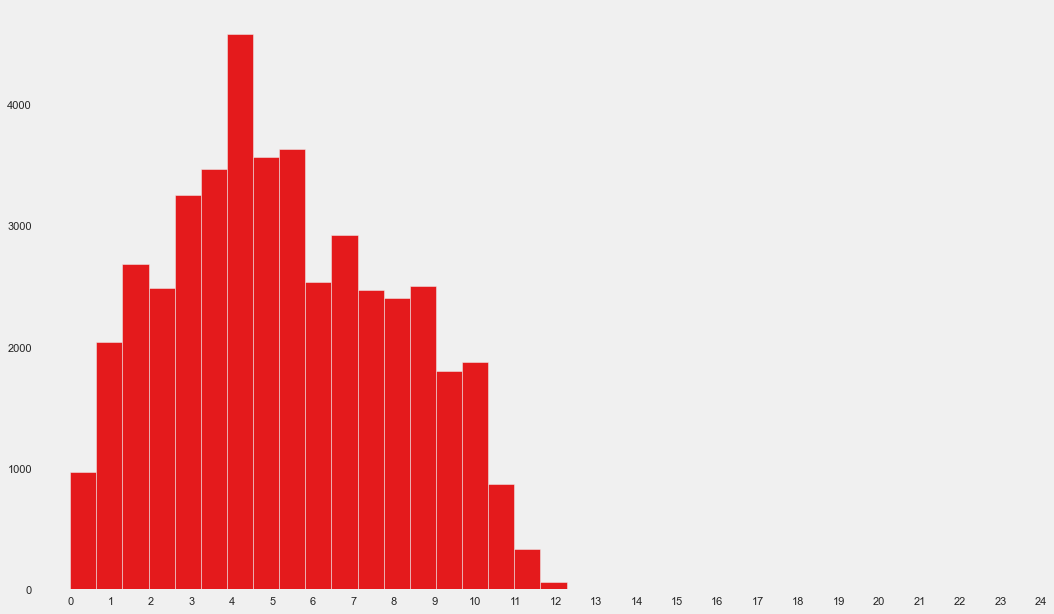

In [103]:
plt.figure(figsize = (16,10))
plt.hist(train['online_hours'], bins = 24)
plt.xticks(np.arange(0,25))
plt.grid()

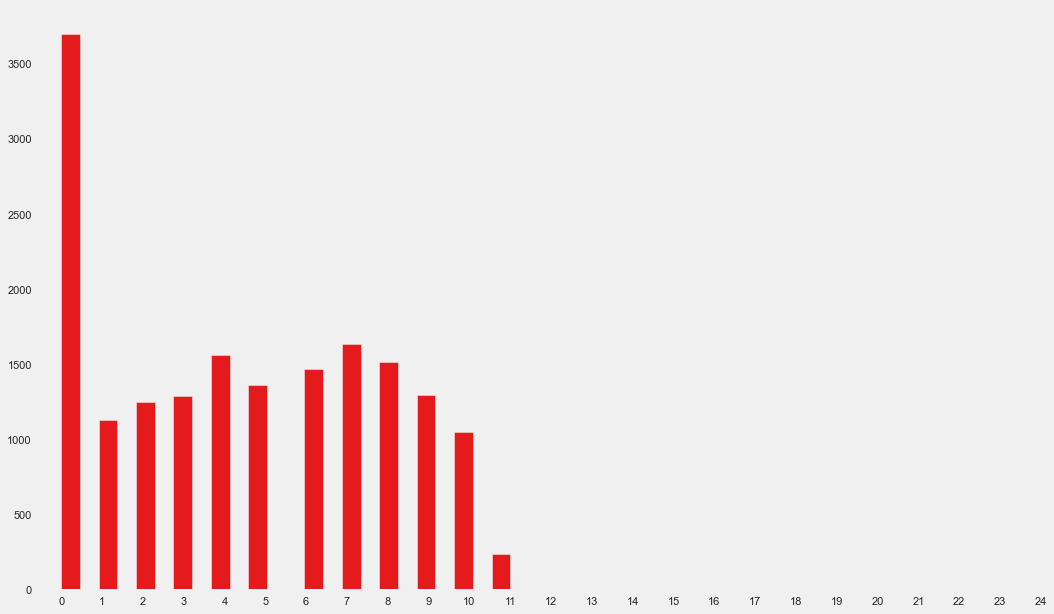

In [104]:
plt.figure(figsize = (16,10))
plt.hist(test['online_hours'], bins = 24)
plt.xticks(np.arange(0,25))
plt.grid()

In [105]:
train_hours_by_day = train.groupby(by = ["date"])['online_hours'].sum()
train_hours_by_day

date
2017-05-31     5565.7
2017-06-01    12161.7
2017-06-02    10404.1
2017-06-03     8635.5
2017-06-04    10218.8
2017-06-05    12139.7
2017-06-06    12158.7
2017-06-07    12263.4
2017-06-08    12222.2
2017-06-09    10509.6
2017-06-10     8658.6
2017-06-11    10527.9
2017-06-12    12238.8
2017-06-13    12171.0
2017-06-14    12020.3
2017-06-15    12261.9
2017-06-16    10595.4
2017-06-17     8868.6
2017-06-18    10457.8
2017-06-19    12175.9
2017-06-20    12146.0
2017-06-21     6724.8
Name: online_hours, dtype: float64

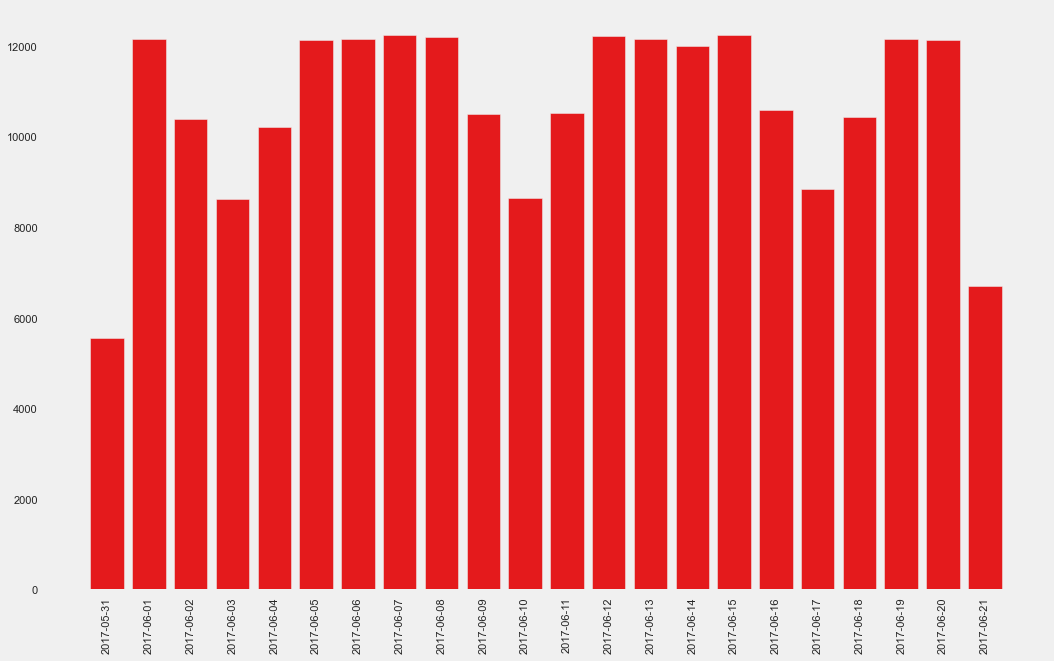

In [106]:
plt.figure(figsize = (16,10))
plt.bar(train_hours_by_day.index, train_hours_by_day.values)
plt.xticks(train_hours_by_day.index, rotation = 90)
plt.grid()

In [107]:
test_hours_by_day = test.groupby(by = ["date"])['online_hours'].sum()
test_hours_by_day

date
2017-06-22    12088
2017-06-23    12088
2017-06-24     8664
2017-06-25     8705
2017-06-26    12111
2017-06-27    12075
2017-06-28    12036
Name: online_hours, dtype: int64

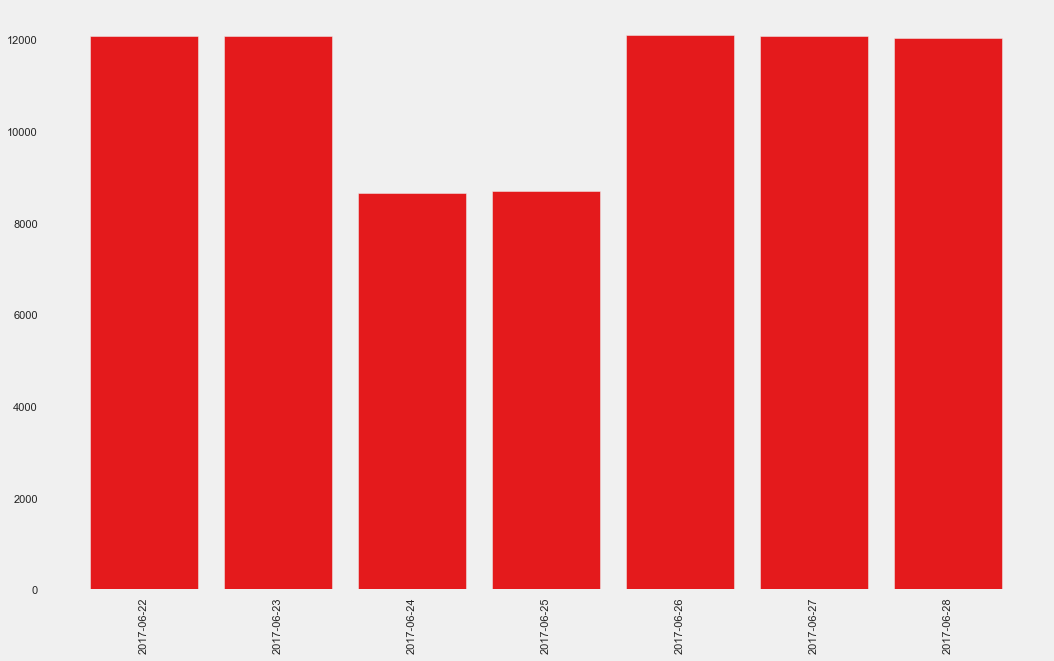

In [108]:
plt.figure(figsize = (16,10))
plt.bar(test_hours_by_day.index, test_hours_by_day.values)
plt.xticks(test_hours_by_day.index, rotation = 90)
plt.grid()

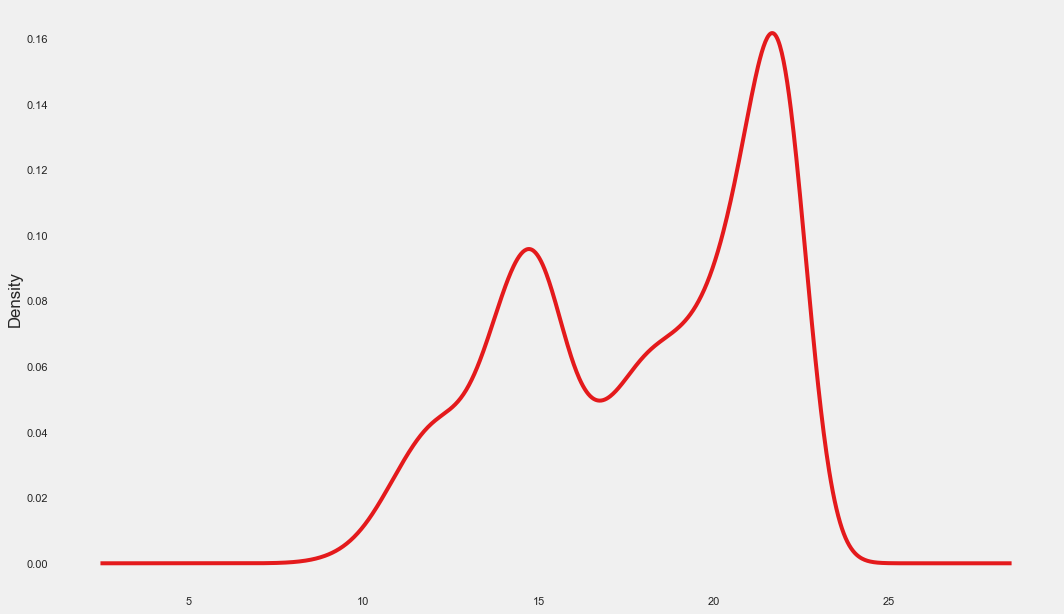

In [110]:
plt.figure(figsize = (16,10))
train.id.value_counts().plot.kde()
plt.grid()

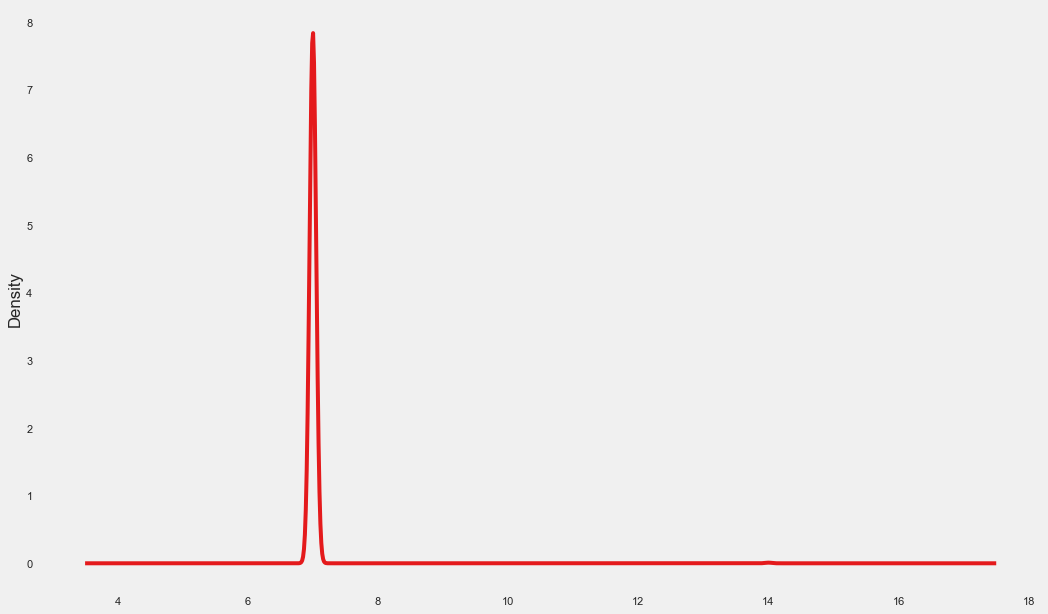

In [111]:
plt.figure(figsize = (16,10))
test.id.value_counts().plot.kde()
plt.grid()

[Text(0, 0, '2017-05-31'),
 Text(1, 0, '2017-06-01'),
 Text(2, 0, '2017-06-02'),
 Text(3, 0, '2017-06-03'),
 Text(4, 0, '2017-06-04'),
 Text(5, 0, '2017-06-05'),
 Text(6, 0, '2017-06-06'),
 Text(7, 0, '2017-06-07'),
 Text(8, 0, '2017-06-08'),
 Text(9, 0, '2017-06-09'),
 Text(10, 0, '2017-06-10'),
 Text(11, 0, '2017-06-11'),
 Text(12, 0, '2017-06-12'),
 Text(13, 0, '2017-06-13'),
 Text(14, 0, '2017-06-14'),
 Text(15, 0, '2017-06-15'),
 Text(16, 0, '2017-06-16'),
 Text(17, 0, '2017-06-17'),
 Text(18, 0, '2017-06-18'),
 Text(19, 0, '2017-06-19'),
 Text(20, 0, '2017-06-20'),
 Text(21, 0, '2017-06-21')]

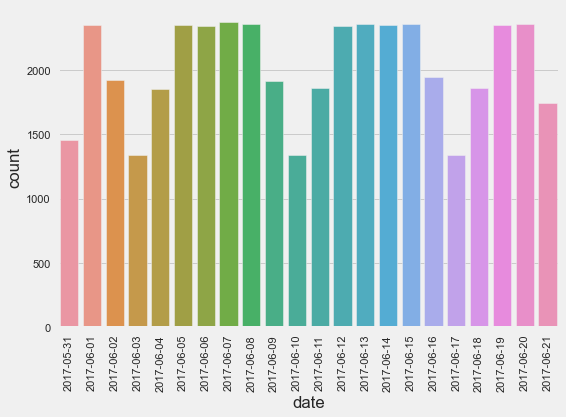

In [112]:
import seaborn as sns
g = sns.countplot(x=train['date'], order = train.date.sort_values().unique().tolist())
g.set_xticklabels(g.get_xticklabels(), rotation=90)

[Text(0, 0, '1498089600000000000'),
 Text(1, 0, '1498176000000000000'),
 Text(2, 0, '1498262400000000000'),
 Text(3, 0, '1498348800000000000'),
 Text(4, 0, '1498435200000000000'),
 Text(5, 0, '1498521600000000000'),
 Text(6, 0, '1498608000000000000')]

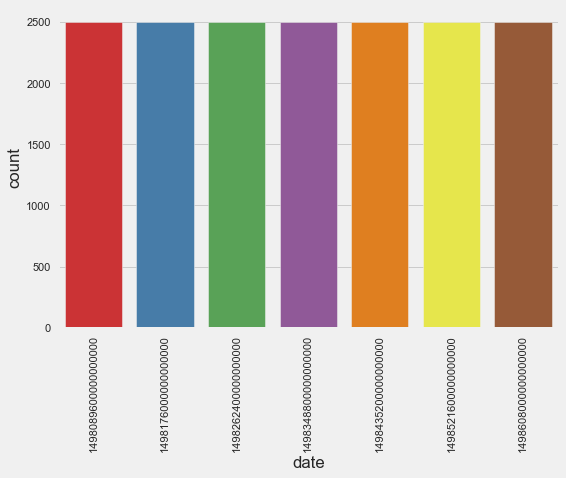

In [113]:
g = sns.countplot(x=test['date'], order = test.date.sort_values().unique().tolist())
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [114]:
train

,id,date,online_hours
0,111556,2017-05-31,2.2
1,111556,2017-06-01,2.5
2,111556,2017-06-04,4.7
3,111556,2017-06-05,3.2
4,111556,2017-06-06,2.7
...,...,...,...
44467,998229,2017-06-16,7.6
44468,998229,2017-06-17,4.9
44469,998229,2017-06-18,6.5
44470,998229,2017-06-19,9.2


In [115]:
test

,id,date,online_hours
0,979863,2017-06-28,7
1,979863,2017-06-27,9
2,979863,2017-06-26,9
3,979863,2017-06-25,10
4,979863,2017-06-24,9
...,...,...,...
17495,165666,2017-06-26,7
17496,165666,2017-06-25,7
17497,165666,2017-06-24,10
17498,165666,2017-06-23,6


In [116]:
test.sort_values(['id', 'date'], ascending=[True, True])

,id,date,online_hours
181,111556,2017-06-22,2
180,111556,2017-06-23,5
179,111556,2017-06-24,0
178,111556,2017-06-25,0
177,111556,2017-06-26,0
...,...,...,...
12387,998740,2017-06-24,0
12386,998740,2017-06-25,0
12385,998740,2017-06-26,0
12384,998740,2017-06-27,0


In [117]:
import pandas as pd
from datetime import datetime

datelist = pd.date_range(train['date'][0], train['date'].iloc[-1]).tolist()
for i in train['id'].unique():
    user_dates = train[train['id'] == i]['date']
    for j in datelist:
        if str(pd.to_datetime(j).date()) not in str(user_dates):
            train.loc[len(train.index)] = [i, pd.to_datetime(j).date(), 0]  
print(train)    

           id        date  online_hours
0      111556  2017-05-31           2.2
1      111556  2017-06-01           2.5
2      111556  2017-06-04           4.7
3      111556  2017-06-05           3.2
4      111556  2017-06-06           2.7
...       ...         ...           ...
54555  998215  2017-06-11           0.0
54556  998215  2017-06-17           0.0
54557  998215  2017-06-18           0.0
54558  998229  2017-05-31           0.0
54559  998229  2017-06-20           0.0

[54560 rows x 3 columns]


In [118]:
train.sort_values(['id', 'date'], ascending=[True, True], ignore_index = True, inplace = True)
train

,id,date,online_hours
0,111556,2017-05-31,2.2
1,111556,2017-06-01,2.5
2,111556,2017-06-02,0.0
3,111556,2017-06-03,0.0
4,111556,2017-06-04,4.7
...,...,...,...
54555,998229,2017-06-17,4.9
54556,998229,2017-06-18,6.5
54557,998229,2017-06-19,9.2
54558,998229,2017-06-20,0.0


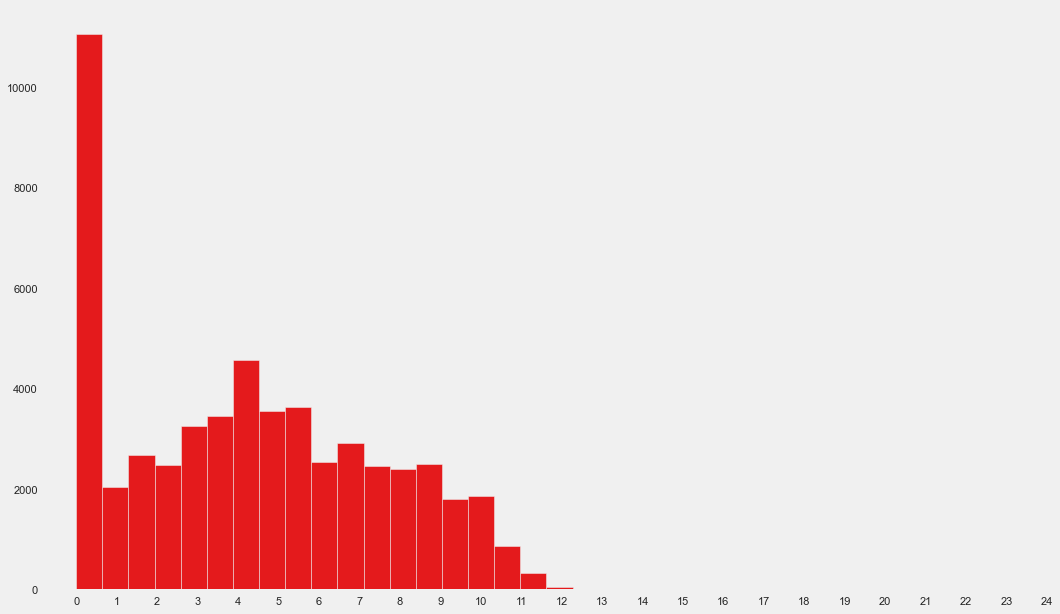

In [119]:
plt.figure(figsize = (16,10))
plt.hist(train['online_hours'], bins = 24)
plt.xticks(np.arange(0,25))
plt.grid()

[Text(0, 0, '2017-05-31'),
 Text(1, 0, '2017-06-01'),
 Text(2, 0, '2017-06-02'),
 Text(3, 0, '2017-06-03'),
 Text(4, 0, '2017-06-04'),
 Text(5, 0, '2017-06-05'),
 Text(6, 0, '2017-06-06'),
 Text(7, 0, '2017-06-07'),
 Text(8, 0, '2017-06-08'),
 Text(9, 0, '2017-06-09'),
 Text(10, 0, '2017-06-10'),
 Text(11, 0, '2017-06-11'),
 Text(12, 0, '2017-06-12'),
 Text(13, 0, '2017-06-13'),
 Text(14, 0, '2017-06-14'),
 Text(15, 0, '2017-06-15'),
 Text(16, 0, '2017-06-16'),
 Text(17, 0, '2017-06-17'),
 Text(18, 0, '2017-06-18'),
 Text(19, 0, '2017-06-19'),
 Text(20, 0, '2017-06-20'),
 Text(21, 0, '2017-06-21')]

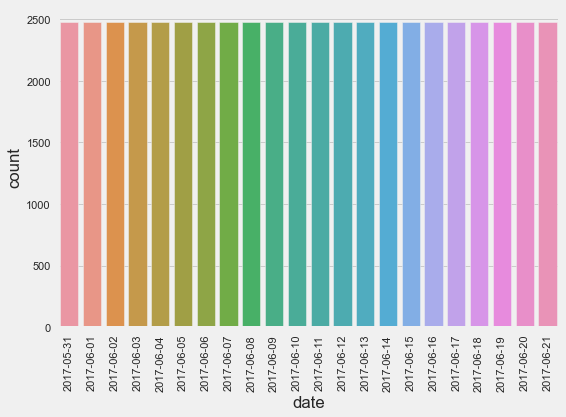

In [120]:
g = sns.countplot(x=train['date'], order = train.date.sort_values().unique().tolist())
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [122]:
from ydata_profiling import ProfileReport
profile = ProfileReport(customers)

In [123]:
profile.to_widgets()

In [125]:
train.to_csv('/Users/nadiiapoliakovska/Documents/Springboard/Users_active_time_prediction/data/processed/train.csv',
            index=False)

In [126]:
test.to_csv('/Users/nadiiapoliakovska/Documents/Springboard/Users_active_time_prediction/data/processed/test.csv',
            index=False)